<img src=https://dataaspirant.com/wp-content/uploads/2020/09/1-Credit-card-fraud-detection-with-classification-algorithms.png width=600>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings('ignore')


In [118]:
df = pd.read_csv('creditcard.csv')

In [70]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum().max()

0

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [13]:
round(df['Class'].value_counts() / len(df) * 100, 2)

0    99.83
1     0.17
Name: Class, dtype: float64

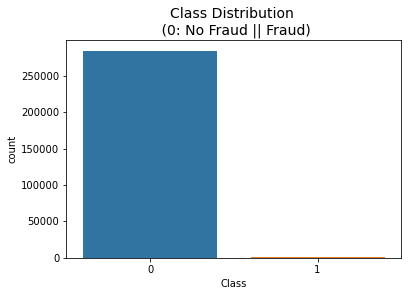

In [20]:
sns.countplot(data=df, x='Class')
plt.title('Class Distribution \n (0: No Fraud || Fraud)', fontsize=14)
plt.show()

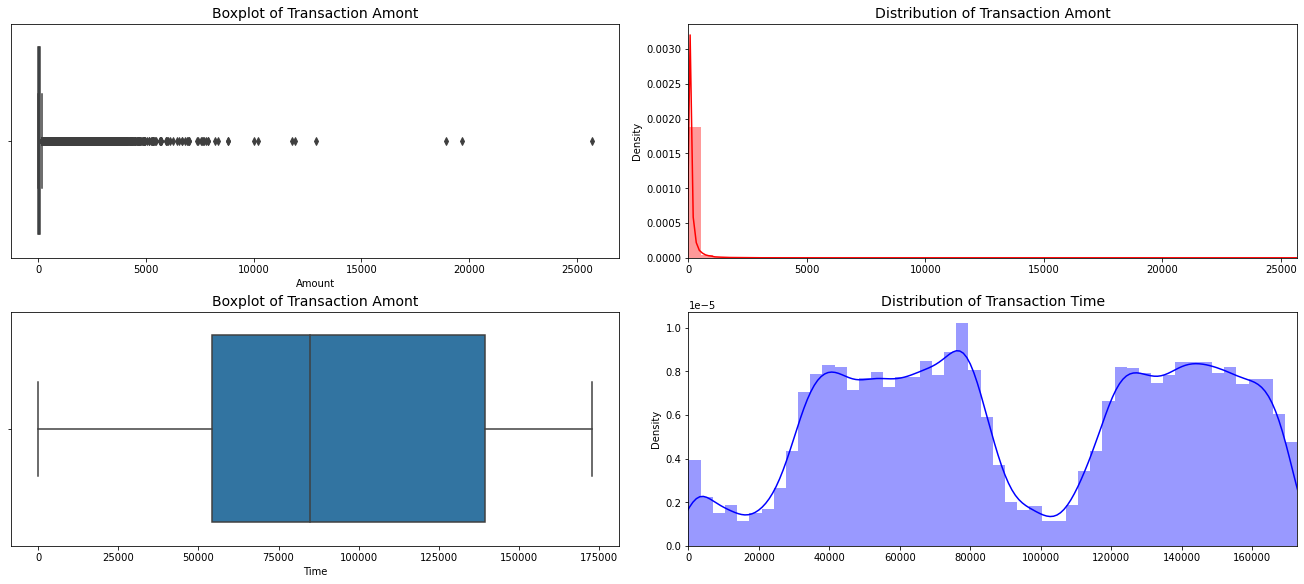

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(18, 8), layout='constrained')

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0,1], color='r')
sns.boxplot(df['Amount'], ax=ax[0,0])
ax[0,1].set_title('Distribution of Transaction Amont', fontsize=14)
ax[0,0].set_title('Boxplot of Transaction Amont', fontsize=14)
ax[0,1].set_xlim(min(amount_val), max(amount_val))



sns.distplot(time_val, ax=ax[1,1], color='b')
sns.boxplot(df['Time'], ax=ax[1,0])
ax[1,1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1,0].set_title('Boxplot of Transaction Amont', fontsize=14)
ax[1,1].set_xlim(min(time_val), max(time_val))               


plt.show()

# Scaling and Distributing

In [55]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()


# df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

### Another method for Scaling

In [72]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
ct = ColumnTransformer([('scaler', StandardScaler(), ['Time', 'Amount'])], remainder='passthrough')
df = pd.DataFrame(ct.fit_transform(df), columns=df.columns)

In [77]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
X = df.drop('Class', axis=1)
y = df['Class']

# sss = StratifiedShuffleSplit(n_splits=5, random_state=0)
sss = StratifiedKFold(n_splits=5, random_state=None , shuffle=False)


for i, (train_index, test_index) in enumerate(sss.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Fold 0:
  Train: index=[ 30473  30496  31002 ... 284804 284805 284806]
  Test:  index=[    0     1     2 ... 57017 57018 57019]
Fold 1:
  Train: index=[     0      1      2 ... 284804 284805 284806]
  Test:  index=[ 30473  30496  31002 ... 113964 113965 113966]
Fold 2:
  Train: index=[     0      1      2 ... 284804 284805 284806]
  Test:  index=[ 81609  82400  83053 ... 170946 170947 170948]
Fold 3:
  Train: index=[     0      1      2 ... 284804 284805 284806]
  Test:  index=[150654 150660 150661 ... 227866 227867 227868]
Fold 4:
  Train: index=[     0      1      2 ... 227866 227867 227868]
  Test:  index=[212516 212644 213092 ... 284804 284805 284806]


In [107]:
np.unique(original_ytrain, return_counts=True)

(array([0., 1.]), array([227452,    394]))

In [108]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

In [112]:
print('Label Distribution: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distribution: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [122]:
# shuffle the data before creating the subsamples
df = df.sample(frac=1)

In [128]:
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

In [134]:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)

In [135]:
normal_distributed_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11710,20011.0,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,...,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1.00,1
58761,48533.0,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,...,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,1.00,1
91671,63578.0,-0.639191,-0.085595,1.265452,1.401166,-0.260542,1.009795,1.301999,-0.135258,-0.431521,...,0.340331,0.760170,0.353377,-0.778893,-0.070681,-0.033355,-0.061962,-0.062687,290.18,1
150660,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1
191690,129371.0,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,...,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,0.00,1


# Equally Distribution and Correlating

Now we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing

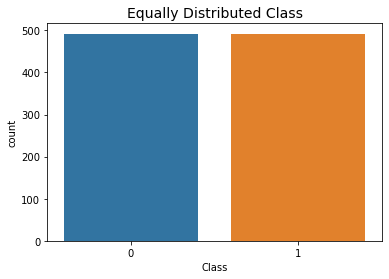

In [137]:
sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Class', fontsize=14)
plt.show()

# Corrolation Matrix

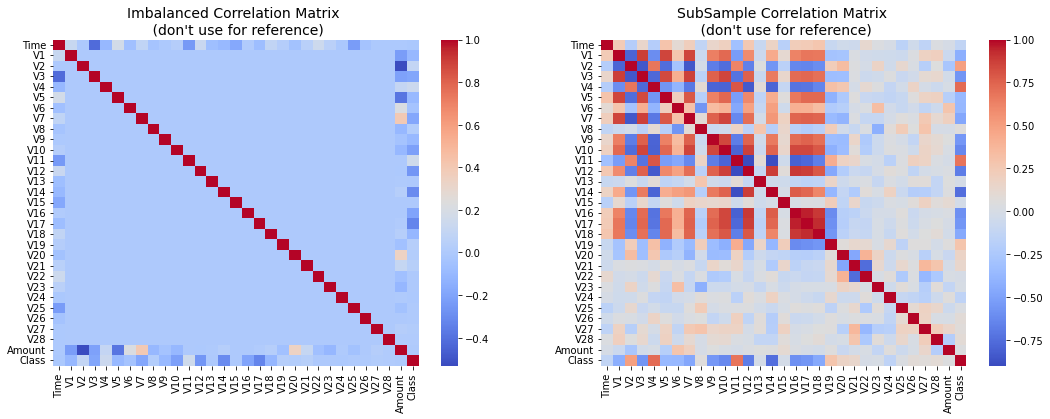

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(df.corr(), ax= ax[0], cmap='coolwarm', annot_kws={'size':20})
ax[0].set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)



sns.heatmap(new_df.corr(), ax=ax[1], cmap='coolwarm', annot_kws={'size':20})
ax[1].set_title("SubSample Correlation Matrix \n (don't use for reference)", fontsize=14)

plt.show()

In [158]:
# Most Negative Correlation with Class
new_df.corr()['Class'].sort_values()[:6]

V14   -0.749106
V12   -0.676490
V10   -0.625791
V16   -0.593090
V3    -0.568951
V17   -0.560882
Name: Class, dtype: float64

In [159]:
# Most Positive Correlation with Class
new_df.corr()['Class'].sort_values(ascending=False)[:6]

Class    1.000000
V4       0.719534
V11      0.684646
V2       0.494340
V19      0.286002
V20      0.166229
Name: Class, dtype: float64

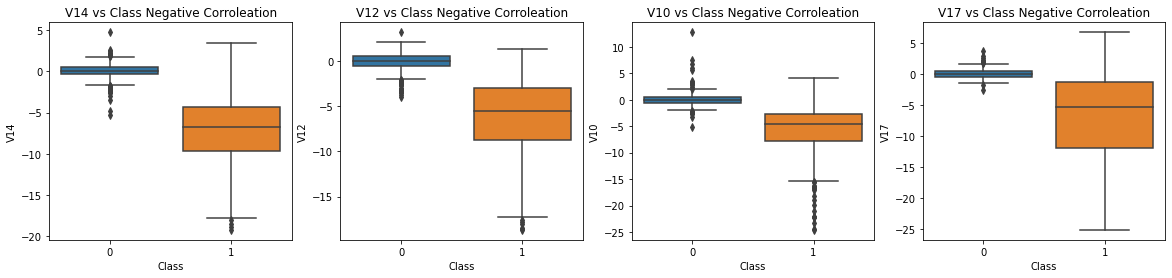

In [161]:
fig, ax = plt.subplots(1, 4 , figsize=(20, 4))

sns.boxplot(x='Class', y='V14', data=new_df, ax=ax[0])
ax[0].set_title('V14 vs Class Negative Corroleation')

sns.boxplot(x='Class', y='V12', data=new_df, ax=ax[1])
ax[1].set_title('V12 vs Class Negative Corroleation')

sns.boxplot(x='Class', y='V10', data=new_df, ax=ax[2])
ax[2].set_title('V10 vs Class Negative Corroleation')

sns.boxplot(x='Class', y='V17', data=new_df, ax=ax[3])
ax[3].set_title('V17 vs Class Negative Corroleation')
plt.show()

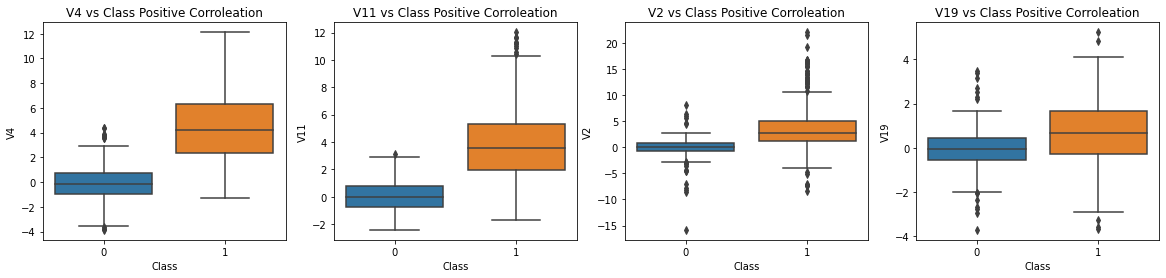

In [162]:
fig, ax = plt.subplots(1, 4 , figsize=(20, 4))

sns.boxplot(x='Class', y='V4', data=new_df, ax=ax[0])
ax[0].set_title('V4 vs Class Positive Corroleation')

sns.boxplot(x='Class', y='V11', data=new_df, ax=ax[1])
ax[1].set_title('V11 vs Class Positive Corroleation')

sns.boxplot(x='Class', y='V2', data=new_df, ax=ax[2])
ax[2].set_title('V2 vs Class Positive Corroleation')

sns.boxplot(x='Class', y='V19', data=new_df, ax=ax[3])
ax[3].set_title('V19 vs Class Positive Corroleation')
plt.show()

# Anolamaly Detection

Our main aim is to remove "extreme outliers" from features that have a high corrolation with our classes. This 